# Project 2: Choosing a Model for Predicting on Unseen Data

Before we start, please put your name and CUID in following format

: Firstname LASTNAME, #00000000   //   e.g. Nianyi LI, #12345678

**Your Answer:**   
Lakshmi Gayathri Rangaraju, #C81311556

# General Rules of the Project Submission

Python 3 and [Matplotlib](https://matplotlib.org/) will be used throughout the semseter, so it is important to be familiar with them. It is strongly suggested to go through [Stanford CS231n](http://cs231n.github.io/python-numpy-tutorial/) and [CS228](https://github.com/kuleshov/cs228-material/blob/master/tutorials/python/cs228-python-tutorial.ipynb) for more detailed Python and numpy tutorials if you haven't had used Python before. 

In some cells and files you will see code blocks that look like this:

```python
##############################################################################
#                    TODO: Write the equation for a line                     #
##############################################################################
pass
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################
```

You should replace the `pass` statement with your own code and leave the blocks intact, like this:

```python
##############################################################################
#                    TODO: Write the equation for a line                     #
##############################################################################
y = m * x + b
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################
```

When completing the notebook, please adhere to the following rules:
- Do not write or modify any code outside of code blocks
- Follow the instruction of the project description carefully
- Run all cells before submitting. <span style="color:red">**You will only get credit for code that has been run!**.</span>

The last point is extremely important and bears repeating:

### We will not re-run your notebook -- <span style="color:red">you will only get credit for cells that have been run</span>

### File name
Your Python program should be named **yourlastname_yourfirstname_P2.ipynb**, then zip it and upload to Canvas

### Package usage
You <span style="color:red">**cannot**</span> use python machine learning package that can have the k-fold validation algorithm as embedded function, for instance, **sklearn** package.

# Project Description

For Project 2 you will create a regression program and choose a model to predict the women’s Olympic 100-meter race record time for year **2024**. We will code the year of each race as we did in lecture 2.3. 

![caption](https://nianyil.people.clemson.edu/CPSC_4430/P2.jpg)


## Data File

A text file with the data is available on Canvas for the years 1928 through 2008 when the Olympics were held. The first line of the text file indicating there’re **m** lines of data and a **n** number of features (in this case, one). You need to write a code to read data from the file. You **can** use packages, such as **panda**, to load the data.

In [87]:
##############################################################################
#         TODO: Write the code for reading data from file                    #
##############################################################################
import pandas as pd
import numpy as np

data = pd.read_csv("W100MTimes.txt", sep="\t", names=["Year", "Time in secs"])
x = pd.DataFrame(data["Year"])
x0 = np.ones(len(x), dtype=np.int8)
x.insert(loc = 0, column = 'x0', value = x0)
y = data["Time in secs"]
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

## Pick the Best Model

Your project assignment is to compare four different models, linear, quadratic, cubic, and fourth. 

- $h_w(x) = w_0 + w_1x$
- $h_w(x) = w_0 + w_1x + w_2x^2$
- $h_w(x) = w_0 + w_1x + w_2x^2 + w_3x^3$
- $h_w(x) = w_0 + w_1x + w_2x^2 + w_3x^3 + w_4x^4$


In [88]:
##############################################################################
#                 TODO: Define the regression models                         #
##############################################################################
import numpy as np

linear = x

quadratic = linear.copy(deep=True)
year_2 = quadratic["Year"]**2
quadratic.insert(loc = 2, column = "Year^2", value = year_2)

cubic = quadratic.copy(deep=True)
year_3 = cubic["Year"]**3
cubic.insert(loc = 3, column = 'year^3', value = year_3)

fourth = cubic.copy(deep=True)
year_4 = fourth["Year"]**4
fourth.insert(loc = 4, column = 'year^4', value = year_4)

linear.insert(loc = 2, column = "Time in secs", value = y)
quadratic.insert(loc = 3, column = "Time in secs", value = y)
cubic.insert(loc = 4, column = 'Time in secs', value = y)
fourth.insert(loc = 5, column = 'Time in secs', value = y)

def get_weights(x, y):
    w = np.matmul(np.matmul(np.linalg.inv(np.matmul(x.transpose(), x)), x.transpose()), y)
    return w

def get_training_data(num_examples, fold, data):
    lower_limit = (0 if fold==1 else num_examples*(fold-1)) 
    upper_limit = num_examples*fold
    val_data = data[lower_limit: upper_limit]
    val_ind = data.index.isin(range(lower_limit, upper_limit))
    train_data =  data[~val_ind]
    return (train_data, val_data)

def get_mean_square_error(x, w, y):
    predicted = np.matmul(x, w)
    temp = predicted-y
    m = x.shape[0]
    error = np.matmul(np.transpose(temp), temp) / m
    return error
    
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

Next, you need to use <span style="color:red">**5-fold cross validation**</span> to pick out the best model for the prediction. You should present a chart of the error function $J$, similar to the one in the lecture (see below). You may need to use package like "**tabulate**" to print out the table.

```
                     Linear    Quadratic    Cubic    Fourth
-----------------  --------  -----------  -------  --------
1234                  10.25        24.25    12.25     23.25
5                     10.25        19.25    14.25     23.25
1235                  10.25        15.25    19.25     23.25
4                     10.25        10.25    20.25     23.25
1245                  10.25        24.25    12.25     23.25
3                     10.25        19.25    14.25     23.25
1345                  10.25        24.25    12.25     23.25
2                     10.25        19.25    14.25     23.25
2345                  10.25        24.25    12.25     23.25
1                     10.25        19.25    14.25     23.25
Mean for Training      0            0        0         0
Mean for Testing       0            0        0         0
```

You need to **plot** your training and testing $J$ with respect to the polynomial degree, similar to the one in the lecture.

In [89]:
##############################################################################
#                     TODO: 5-fold cross-validation                         #
##############################################################################
linear_errors = []
quadratic_errors = []
cubic_errors = []
fourth_errors = []
indices = []

linear_train_mse = 0
linear_val_mse = 0
cubic_train_mse = 0
cubic_val_mse = 0
quad_train_mse = 0
quad_val_mse = 0
fourth_train_mse = 0
fourth_val_mse = 0

num_examples = len(x) // 5
for fold in range(1,6):
    train_str = ""
    for num in range(1,6):
        if num != fold:
            train_str = train_str + str(num)
            
    indices.append(train_str)
    indices.append(fold)
    
    # Cal error for linear model
    train_data, val_data = get_training_data(num_examples, fold, linear)
    train_x, train_y, val_x, val_y = train_data.iloc[:,0:2], train_data.iloc[:, -1], val_data.iloc[:,0:2], val_data.iloc[:, -1]
    weights = get_weights(train_x, train_y)
    train_j = get_mean_square_error(train_x, weights, train_y)
    val_j = get_mean_square_error(val_x, weights, val_y)
    linear_errors.append(train_j)
    linear_train_mse = linear_train_mse + train_j
    linear_errors.append(val_j)
    linear_val_mse = linear_val_mse + val_j
    
    # Cal error for quadratic model
    train_data, val_data = get_training_data(num_examples, fold, quadratic)
    train_x, train_y, val_x, val_y = train_data.iloc[:,0:3], train_data.iloc[:, -1], val_data.iloc[:,0:3], val_data.iloc[:, -1]
    weights = get_weights(train_x, train_y)
    train_j = get_mean_square_error(train_x, weights, train_y)
    val_j = get_mean_square_error(val_x, weights, val_y)
    quadratic_errors.append(train_j)
    quad_train_mse = quad_train_mse + train_j
    quadratic_errors.append(val_j)
    quad_val_mse = quad_val_mse + val_j
    
    # Cal error for cubic model
    train_data, val_data = get_training_data(num_examples, fold, cubic)
    train_x, train_y, val_x, val_y = train_data.iloc[:,0:4], train_data.iloc[:, -1], val_data.iloc[:,0:4], val_data.iloc[:, -1]
    weights = get_weights(train_x, train_y)
    train_j = get_mean_square_error(train_x, weights, train_y)
    val_j = get_mean_square_error(val_x, weights, val_y)
    cubic_errors.append(train_j)
    cubic_train_mse = cubic_train_mse + train_j
    cubic_errors.append(val_j)
    cubic_val_mse = cubic_val_mse + val_j
    
    # Cal error for fourth model
    train_data, val_data = get_training_data(num_examples, fold, fourth)
    train_x, train_y, val_x, val_y = train_data.iloc[:,0:5], train_data.iloc[:, -1], val_data.iloc[:,0:5], val_data.iloc[:, -1]
    weights = get_weights(train_x, train_y)
    train_j = get_mean_square_error(train_x, weights, train_y)
    val_j = get_mean_square_error(val_x, weights, val_y)
    fourth_errors.append(train_j)
    fourth_train_mse = fourth_train_mse + train_j
    fourth_errors.append(val_j)
    fourth_val_mse = fourth_val_mse + val_j
    
mean_train = [linear_train_mse/5, quad_train_mse/5, cubic_train_mse/5, fourth_train_mse/5]
mean_test = [linear_val_mse/5, quad_val_mse/5, cubic_val_mse/5, fourth_val_mse/5]
        
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

C:\Users\rlgay\AppData\Local\Temp\ipykernel_38164\778087192.py:26: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  w = np.matmul(np.matmul(np.linalg.inv(np.matmul(x.transpose(), x)), x.transpose()), y)
C:\Users\rlgay\AppData\Local\Temp\ipykernel_38164\778087192.py:38: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying

In [90]:
##############################################################################
#                     TODO: Print out the table chart                       #
##############################################################################
kfold_cross_val_results = pd.DataFrame({"Folds": indices, "Linear": linear_errors, "Quadratic": quadratic_errors, "Cubic":
                                       cubic_errors, "Fourth": fourth_errors})
print(kfold_cross_val_results)
print("Mean Train", mean_train)
print("Mean Test", mean_test)
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

  Folds     Linear  Quadratic      Cubic     Fourth
0  2345   0.044168   0.026931   0.025022   0.024967
1     1  29.620627  37.727886  48.613408  55.681805
2  1345   5.396303   4.198064   1.684869   0.562820
3     2   2.551925   0.446558   5.195475   2.120409
4  1245   5.815370   4.078013   2.193300   0.629102
5     3   0.285059   1.438713   0.337457   1.307580
6  1235   5.818158   4.119748   2.044616   0.728612
7     4   0.296614   1.040757   1.765498   0.282597
8  1234   5.641634   3.598446   1.517008   0.457542
9     5   2.030167  15.762962  46.449497  84.415540
Mean Train [4.5431267730025, 3.204240530580885, 1.4929630297132133, 0.48060848541678586]
Mean Test [6.956878326604722, 11.283375045276888, 20.472266818911358, 28.761585983664343]


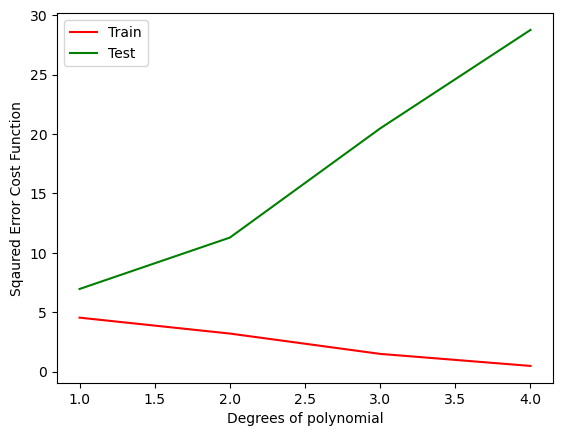

In [91]:
##############################################################################
#                     TODO: Plot the J curve                                 #
##############################################################################
import matplotlib.pyplot as plt
x_axis = [1,2,3,4]
plt.plot(x_axis, mean_train, 'r', label="Train")
plt.plot(x_axis, mean_test, 'g', label="Test")
plt.legend()
plt.xlabel("Degrees of polynomial")
plt.ylabel("Sqaured Error Cost Function")
plt.show()
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

Based on your data and plot, you should then briefly discuss **which model is the best** for the record time prediction.

**Your Answer:**  
According to the above plot, the linear model is having low train and test error. So for the given dataset, I choose linear model for the record time prediction.

Next, compute the final weights of the best model utilizing the **complete data set**

In [92]:
##############################################################################
#              TODO: Calculate the final regression model                    #
##############################################################################
linear_regression_weights = get_weights(linear.iloc[:,0:2], linear.iloc[:,-1])
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

C:\Users\rlgay\AppData\Local\Temp\ipykernel_38164\778087192.py:26: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  w = np.matmul(np.matmul(np.linalg.inv(np.matmul(x.transpose(), x)), x.transpose()), y)


## Prediction Using the Best Model

Write a Python program that takes a **year** as input, then outputs the winning women’s Olympic 100-meter **race time** for that year (round to two decimal places). You need to try and print out the results of **at least three different years**, and the final trial should output the race time of **2024**.

In [93]:
##############################################################################
#         TODO: Predict the race time using the best model                   #
##############################################################################
def predict(x, w):
    x = x - 1900
    test_x = [1, x]
    test_x = np.array(test_x)
    return np.matmul(test_x, w)

print("{:.2f}".format(predict(2004, linear_regression_weights)))
print("{:.2f}".format(predict(2014, linear_regression_weights,)))
print("{:.2f}".format(predict(2024, linear_regression_weights,)))
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

11.62
11.88
12.13
